In [464]:
import numpy as np
import pandas as pd 
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors
import re
import seaborn as sns
import matplotlib.pyplot as plt 

In [466]:
df = pd.read_csv('mymoviedb.csv', lineterminator = "\n")

In [468]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [472]:
df.isnull()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9832,False,False,False,False,False,False,False,False,False
9833,False,False,False,False,False,False,False,False,False
9834,False,False,False,False,False,False,False,False,False
9835,False,False,False,False,False,False,False,False,False


In [474]:
print(df['Release_Date'].iloc[1100:1110])  # Inspect a range around position 1106
print(df['Release_Date'].unique())  # Check unique values


1100                    8/18/2017
1101                     5/7/2013
1102                    5/14/2016
1103                   12/15/2021
1104                    8/21/2012
1105                   10/20/2013
1106              - Just Desserts
1107            - If The Hue Fits
1108                    - Dust Up
1109     - Scents And Sensibility
Name: Release_Date, dtype: object
['12/15/2021' '3/1/2022' '2/25/2022' ... '11/6/1974' '10/15/1973'
 '9/23/1984']


In [476]:

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [478]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   object        
 5   Vote_Average       9827 non-null   object        
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
        9837 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 691.8+ KB


In [480]:
df.duplicated().sum()

8

In [482]:
df = df.drop_duplicates()

In [484]:
df.describe()

,Release_Date,Popularity
count,9827,9827.000000
mean,2006-09-23 11:05:51.317797888,40.320570
min,1902-04-17 00:00:00,7.100000
25%,2000-10-18 00:00:00,16.127500
50%,2011-09-13 00:00:00,21.191000
75%,2017-11-22 00:00:00,35.174500
max,2024-07-03 00:00:00,5083.954000
std,NaN,108.874308


In [486]:
df = df[df['Release_Date'].notna()]
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [609]:
df['Release_Date'] =df['Release_Date'].dt.year

In [611]:
df['Vote_Count']

0        8940
1        8940
2        8940
3        1151
4        1151
         ... 
25787     152
25788     152
25789     186
25790     186
25791     186
Name: Vote_Count, Length: 25792, dtype: object

In [613]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [615]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


# dropping the columns

In [618]:
cols = [ 'Overview','Original_Language','Poster_Url\r']
df.drop (cols, axis = 1 ,inplace = True)
df.columns


KeyError: "['Overview', 'Original_Language', 'Poster_Url\\r'] not found in axis"

In [622]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [624]:
df['Vote_Average'].value_counts()

Vote_Average
6.6    1161
6.4    1161
6.7    1159
6.5    1141
6.8    1141
       ... 
1.5       2
3.1       2
10        2
9.2       1
2.4       1
Name: count, Length: 74, dtype: int64

In [626]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [628]:
df.dropna(inplace = True)


# we'd split geners into a list nd then explode out dataframe to have only one genre per row each movie

In [631]:
print(df['Genre'].dtype)

category


In [633]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [635]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)


In [637]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [639]:
df['Genre'] = df ['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  int32   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  object  
 5   Genre         25792 non-null  category
dtypes: category(1), float64(1), int32(1), object(3)
memory usage: 932.8+ KB


In [643]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25787    False
25788    False
25789    False
25790    False
25791    False
Length: 25792, dtype: bool

In [645]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [647]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

In [649]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [651]:
sns.set_style("whitegrid")

Q1:- What is the most frequent genre of movies released on Netflix?

In [654]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



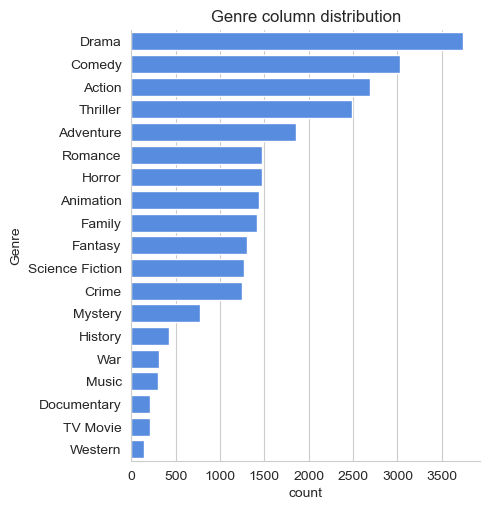

In [656]:
sns.catplot(y = 'Genre' , data = df, kind ='count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

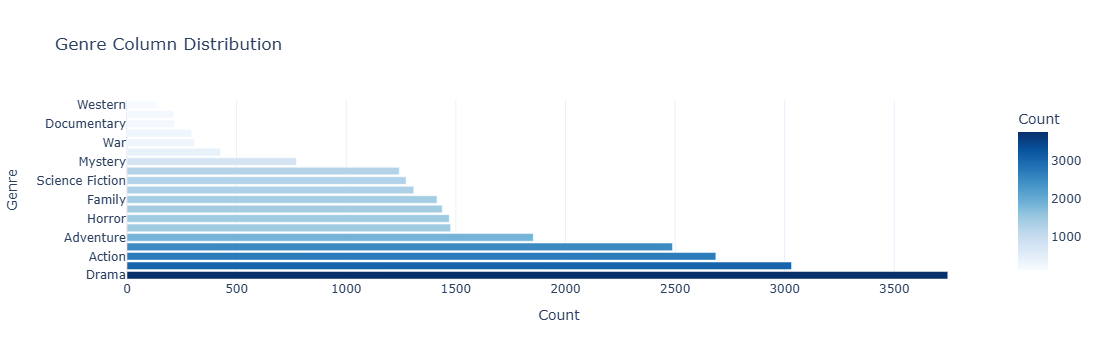

In [657]:
import plotly.express as px

# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']  # Rename columns for clarity

# Create a bar plot using Plotly Express
fig = px.bar(
    genre_counts,
    y='Genre',
    x='Count',
    orientation='h',  # Horizontal bar chart
    title='Genre Column Distribution',
    color='Count',  # Add color for visual appeal
    color_continuous_scale='Blues'
)

fig.update_layout(
    yaxis=dict(title='Genre'),
    xaxis=dict(title='Count'),
    template='plotly_white'
)

fig.show()


Q2:- What has highest votes in vote avg column?

In [661]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [663]:
Vote = df.groupby(['Vote_Average', 'Genre']).count()

C:\Users\Admin\AppData\Local\Temp\ipykernel_22584\2132466418.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [665]:
Vote

Release_Date  Title  Popularity  Vote_Count
Vote_Average Genre                                                       
0            Action                     34     34          34          34
             Adventure                  24     24          24          24
             Animation                  13     13          13          13
             Comedy                     25     25          25          25
             Crime                       7      7           7           7
...                                    ...    ...         ...         ...
9.2          Science Fiction             0      0           0           0
             TV Movie                    0      0           0           0
             Thriller                    0      0           0           0
             War                         0      0           0           0
             Western                     0      0           0           0

[1406 rows x 4 columns]

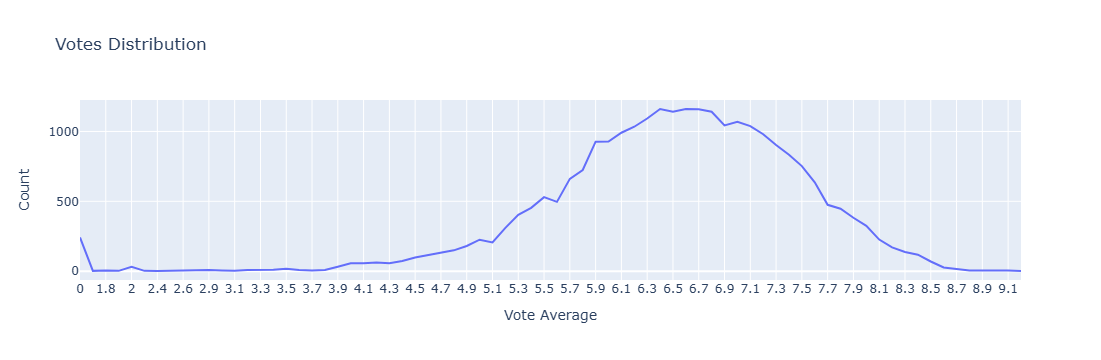

In [667]:

vote_average_counts = df['Vote_Average'].value_counts().sort_index()
fig = px.line(
    x=vote_average_counts.index,  # Unique Vote_Average values (x-axis)
    y=vote_average_counts.values,  # Their counts (y-axis)
    title='Votes Distribution',
    labels={'x': 'Vote Average', 'y': 'Count'},  # Axis labels
)

# Show the figure
fig.show()


Q3:- What movie got the highest popularity? what's genre?

In [670]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [672]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


In [674]:
Q4:- What movie got the lowest popularity? what's genre?

Object `genre` not found.


In [676]:
df[df['Popularity'] ==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25789,1984,Threads,13.354,186,7.8,War
25790,1984,Threads,13.354,186,7.8,Drama
25791,1984,Threads,13.354,186,7.8,Science Fiction


Q5:- What Year has the most filmmed movies?

In [679]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure


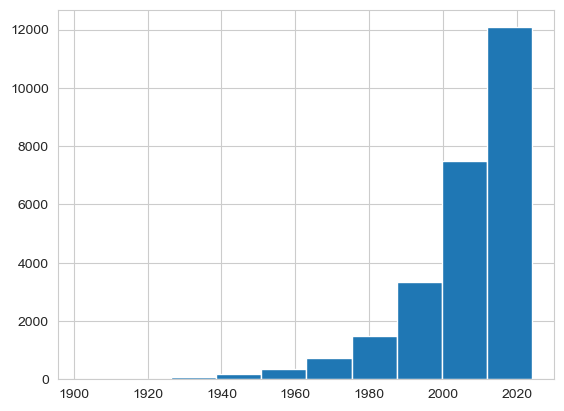

In [682]:
df['Release_Date'].hist()
plt.title =("Release Date")
plt.show()